1) Responda:

a. No contexto de ciência de dados, o que é uma feature? Por que as features precisam ser tratadas antes de serem aplicadas nos algoritmos de Machine Learning?

R: Features são representações de dados brutos. Normalmente, são características que descrevem um objeto. Elas precisam ser tratadas antes de serem aplicadas nos algoritmos de ML pois os modelos só conseguem trabalhar com números (por vezes, os dados estão em variáveis categóricas). A utilização de features desnecessárias ou mal-tratadas aumenta o custo computacional do modelo, de seu treinamento, tempo de treinamento e pode até atrapalhar seu desempenho final.

b. Sabendo que nem todas as features em um dataset são úteis para os modelos de Machine Learning, explique como as features de fato úteis podem ser selecionadas através dos métodos de filtragem, wrapper e embedding.

R: Os métodos de filtragem fazem a escolha das melhores features através de critérios estatísticos. Ou seja, ocorre antes mesmo de iniciarmos o treinamento do modelo e de acordo com os critérios que explicitamos, como o número limite de features ou o limite estatístico que determinamos.
Os métodos de Wrapper são métodos de tentativa-e-erro: eles dividem o total de features em subconjuntos e realizam testes para tentar encontrar o subconjunto que produz os modelos com as melhores previsões.
Por fim, os métodos de embedding ocorrem DURANTE o treinamento do modelo. É algo inerente ao processo de aprendizagem de máquina, onde o melhor subconjunto de features é selecionado como consequência do processo de treinamento. Como exemplo, temos as árvores de decisão.

c. Explique com suas palavras o que são escalares, vetores e espaços vetoriais. Dê a sua resposta ilustrando cada conceito com dados usados em algoritmos de Machine Learning.

Escalares são features numéricas, que, quando ordenadas em uma lista, transformam-se em vetores. Estes, por sua vez, quando agrupados, ocupam um espaço - este é chamado de espaço vetorial. Por exemplo, no breast cancer dataset temos uma coluna de 'radius_mean'. Cada uma das instâncias numéricas é um escalar, enquanto a coluna inteira, com todas as suas instâncias, vai corresponder a um vetor. Quando este vetor é organizado num espaço dimensional juntamente com os outros vetores deste dataset, temos o espaço vetorial correspondente.

2) Considere o breast cancer dataset.

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


a. Identifique as features contínuas deste dataset.

R: Todas as colunas são consideradas features contínuas, com exceção da coluna 'target'. Como o próprio nome diz, este é o nosso target, ou seja, a coluna que o modelo deverá tentar prever.

b. Selecione duas features contínuas do dataset e realize a discretização dessas variáveis por meio de quantização por bins fixos. Apresente os resultados.

In [6]:
import numpy as np

breast_df = X[['mean radius', 'mean perimeter']]
bin1 = np.digitize(breast_df['mean radius'], bins=[10, 15, 20])
bin2 = np.digitize(breast_df['mean perimeter'], bins=[80, 90, 100])

df_bins = pd.DataFrame({'mean radius': bin1, 'mean perimeter': bin2})
df_bins

,mean radius,mean perimeter
0,2,3
1,3,3
2,2,3
3,1,0
4,3,3
...,...,...
564,3,3
565,3,3
566,2,3
567,3,3


c. Selecione duas features contínuas do dataset (podem ser as mesmas do item (b)) e realize a discretização dessas variáveis por meio de quantização por bins variáveis. Apresente os resultados.

In [7]:
bin3 = pd.qcut(breast_df['mean radius'], q=4)
bin4 = pd.qcut(breast_df['mean perimeter'], q=4)

df_bins2 = pd.DataFrame({'mean radius': bin3, 'mean perimeter': bin4})
df_bins2

#cut command creates equispaced bins but frequency of samples is unequal in each bin.
#qcut command creates unequal size bins but frequency of samples is equal in each bin.


,mean radius,mean perimeter
0,"(15.78, 28.11]","(104.1, 188.5]"
1,"(15.78, 28.11]","(104.1, 188.5]"
2,"(15.78, 28.11]","(104.1, 188.5]"
3,"(6.9799999999999995, 11.7]","(75.17, 86.24]"
4,"(15.78, 28.11]","(104.1, 188.5]"
...,...,...
564,"(15.78, 28.11]","(104.1, 188.5]"
565,"(15.78, 28.11]","(104.1, 188.5]"
566,"(15.78, 28.11]","(104.1, 188.5]"
567,"(15.78, 28.11]","(104.1, 188.5]"


3) Considere o breast cancer dataset.

a. Defina uma função personalizada que realize uma normalização nas features do dataset usando FunctionTransformer do sklearn. Apresente os resultados obtidos.

In [8]:
from sklearn.preprocessing import FunctionTransformer

def standard_scaler():
    return FunctionTransformer(lambda x: (x - np.mean(x, axis=0)) / np.std(x, axis=0))

X_scaled = standard_scaler().fit_transform(X)
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


b. Utilize o PowerTransform para normalizar as features do dataset. Apresente os resultados obtidos.

In [9]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_pt = pt.fit_transform(X)
X_pt

array([[ 1.1348813 , -2.67866579,  1.25982246, ...,  1.9356538 ,
         2.19720553,  1.72362439],
       [ 1.61934637, -0.26437746,  1.52872328, ...,  1.10159362,
        -0.12199701,  0.53717869],
       [ 1.46479606,  0.54780605,  1.45466431, ...,  1.72274381,
         1.21818056,  0.45395462],
       ...,
       [ 0.82858878,  1.81761829,  0.81132892, ...,  0.52613602,
        -1.30116426, -0.1708716 ],
       [ 1.62444032,  2.01629863,  1.70274687, ...,  1.93198972,
         1.74469261,  1.85094413],
       [-2.69943157,  1.20322361, -2.82776635, ..., -2.13107031,
         0.10312247, -0.8206632 ]])

4) Considere o breast cancer dataset.

a. Faça uma normalização das features do dataset usando o MinMaxScaler. Apresente os resultados obtidos.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_minMax = scaler.fit_transform(X)
X_minMax

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

b. Faça o escalonamento padrão das features do dataset usando o StandardScaler. Apresente os resultados obtidos.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

c. Faça a regularização das features do dataset usando a norma L2. Apresente os resultados obtidos.

In [12]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
X_norm = scaler.fit_transform(X)
X_norm

array([[7.92541486e-03, 4.57286305e-03, 5.40989964e-02, ...,
        1.16920795e-04, 2.02695018e-04, 5.23808686e-05],
       [8.66575595e-03, 7.48616836e-03, 5.59882822e-02, ...,
        7.83583182e-05, 1.15852352e-04, 3.75024596e-05],
       [9.36668268e-03, 1.01087865e-02, 6.18419883e-02, ...,
        1.15596947e-04, 1.71873157e-04, 4.16624718e-05],
       ...,
       [1.16438847e-02, 1.96964025e-02, 7.59658259e-02, ...,
        9.94640269e-05, 1.55579134e-04, 5.48525170e-05],
       [9.23020523e-03, 1.31418408e-02, 6.27743569e-02, ...,
        1.18738077e-04, 1.83125480e-04, 5.55604587e-05],
       [2.31098880e-02, 7.30820427e-02, 1.42709515e-01, ...,
        0.00000000e+00, 8.55006294e-04, 2.09626935e-04]])

d. É possível aplicar simultaneamente dois ou mesmo os três métodos dos itens anteriores? Explique.

R: Se por 'simultaneamente', vc quis perguntar se eu posso aplicar os três scalers aos mesmo tempo ao mesmo conjunto de dados, então a resposta é não, pois o python não consegue aplicar várias funções ao mesmo conjunto de dados ao mesmo tempo. Entretanto, se estiver perguntando em respeito a aplicar o MinMax Scaler e o Standard Scaler, por exemplo, ao mesmo conjunto de dados, a resposta continua sendo não. O StandardScaler mexe com os valores de forma com que a média deles seja 0 e a variância seja 1, controlando o espalhamento dos dados. Entretanto, para isso, não tem controle sobre os valores máximo e mínimo. Já o MinMax Scaler faz justamente o contrário: ele mexe com os valores de forma com que todos fiquem dentro de uma faixa de valores (normalmente de 0 a 1), mantendo a proporção dos dados e a sua distribuição de probabilidades. Dessa forma, não tem como termos controle sobre a média e variância dos dados. Por isso não dá para aplicarmos os métodos simultaneamente; eles são contraprodutivos.

5) Considere o Large Movie Review Dataset.

In [13]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2025-03-28 10:21:12--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  1.29MB/s    in 67s     

2025-03-28 10:22:20 (1.19 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [14]:
!tar -xzvf aclImdb_v1.tar.gz

A saída de streaming foi truncada nas últimas 5000 linhas.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train

In [15]:
import os
import tarfile

def extract_text_from_targz(targz_path):
    """Extrai todos os arquivos .txt das pastas /train/pos e /train/neg de um arquivo tar.gz.

    Args:
        targz_path: O caminho para o arquivo tar.gz.

    Retorno:
        Uma lista de strings, onde cada string é o conteúdo de um arquivo .txt,
        e uma lista com os rótulos correspondentes (1 para positivo, 0 para negativo).
    """
    all_text = []
    labels = []  # Lista para armazenar os rótulos
    with tarfile.open(targz_path, 'r:gz') as tar:
        for member in tar.getmembers():
            if member.isfile() and member.name.endswith('.txt'):
                # Verifica se o arquivo está em /train/pos ou /train/neg
                if member.name.startswith('aclImdb/train/pos/'):
                    labels.append(1)  # Rótulo 1 para positivo
                    with tar.extractfile(member) as f:
                        text = f.read().decode('utf-8')
                        all_text.append(text)
                elif member.name.startswith('aclImdb/train/neg/'):
                    labels.append(0)  # Rótulo 0 para negativo
                    with tar.extractfile(member) as f:
                        text = f.read().decode('utf-8')
                        all_text.append(text)
    return all_text, labels  # Retorna o texto e os rótulos

targz_path = 'aclImdb_v1.tar.gz'
documents, labels = extract_text_from_targz(targz_path)  # Obtém o texto e os rótulos

a. Remova as stopwords das resenhas do dataset.

In [16]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

documents_without_stopwords = []
for document in documents:
    words = document.split()
    words_without_stopwords = [word for word in words if word.lower() not in stop_words]
    document_without_stopwords = ' '.join(words_without_stopwords)
    documents_without_stopwords.append(document_without_stopwords)

documents_without_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['rented CURIOUS-YELLOW video store controversy surrounded first released 1967. also heard first seized U.S. customs ever tried enter country, therefore fan films considered "controversial" really see myself.<br /><br />The plot centered around young Swedish drama student named Lena wants learn everything life. particular wants focus attentions making sort documentary average Swede thought certain political issues Vietnam War race issues United States. asking politicians ordinary denizens Stockholm opinions politics, sex drama teacher, classmates, married men.<br /><br />What kills CURIOUS-YELLOW 40 years ago, considered pornographic. Really, sex nudity scenes far between, even shot like cheaply made porno. countrymen mind find shocking, reality sex nudity major staple Swedish cinema. Even Ingmar Bergman, arguably answer good old boy John Ford, sex scenes films.<br /><br />I commend filmmakers fact sex shown film shown artistic purposes rather shock people make money shown pornographic

b. Realize o stemming das expressões contidas nas features resultantes da operação realizada no item (a).

In [17]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
documents_stemmed = []
for document in documents_without_stopwords:
    words = document.split()
    words_stemmed = [stemmer.stem(word) for word in words]
    document_stemmed = ' '.join(words_stemmed)
    documents_stemmed.append(document_stemmed)

documents_stemmed

['rent curious-yellow video store controversi surround first releas 1967. also heard first seiz u.s. custom ever tri enter country, therefor fan film consid "controversial" realli see myself.<br /><br />the plot center around young swedish drama student name lena want learn everyth life. particular want focu attent make sort documentari averag swede thought certain polit issu vietnam war race issu unit states. ask politician ordinari denizen stockholm opinion politics, sex drama teacher, classmates, marri men.<br /><br />what kill curious-yellow 40 year ago, consid pornographic. really, sex nuditi scene far between, even shot like cheapli made porno. countrymen mind find shocking, realiti sex nuditi major stapl swedish cinema. even ingmar bergman, arguabl answer good old boy john ford, sex scene films.<br /><br />i commend filmmak fact sex shown film shown artist purpos rather shock peopl make money shown pornograph theater america. curious-yellow good film anyon want studi meat potato

c. Realize a lemmatization das expressões contidas nas features resultantes da operação realizada no item (a)

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
documents_lemmatized = []
for document in documents_without_stopwords:
    words = document.split()
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words]
    document_lemmatized = ' '.join(words_lemmatized)
    documents_lemmatized.append(document_lemmatized)

documents_lemmatized

[nltk_data] Downloading package wordnet to /root/nltk_data...


['rented CURIOUS-YELLOW video store controversy surrounded first released 1967. also heard first seized U.S. custom ever tried enter country, therefore fan film considered "controversial" really see myself.<br /><br />The plot centered around young Swedish drama student named Lena want learn everything life. particular want focus attention making sort documentary average Swede thought certain political issue Vietnam War race issue United States. asking politician ordinary denizen Stockholm opinion politics, sex drama teacher, classmates, married men.<br /><br />What kill CURIOUS-YELLOW 40 year ago, considered pornographic. Really, sex nudity scene far between, even shot like cheaply made porno. countryman mind find shocking, reality sex nudity major staple Swedish cinema. Even Ingmar Bergman, arguably answer good old boy John Ford, sex scene films.<br /><br />I commend filmmaker fact sex shown film shown artistic purpose rather shock people make money shown pornographic theater America

d. Utilize a técnica de Bag-of-Words para vetorizar as resenhas do dataset resultante das operações do item (b). Apresente os resultados obtidos.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(documents_stemmed, labels, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 519266 stored elements and shape (5000, 35906)>

e. Utilize a técnica de Bag-of-n-Grams, identificando bigrams, para vetorizar as resenhas do dataset resultante das operações do item (c). Apresente os resultados obtidos.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(documents_lemmatized, labels, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=5)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
df

,000 000,000 year,10 000,10 10,10 15,10 bethany,10 br,10 film,10 line,10 minute,...,young woman,younger brother,younger generation,younger sister,your face,yourself br,zero day,zeta jones,zombie film,zombie movie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6) Considere o Large Movie Review Dataset

a. Redimensione os dados do dataset pelo método term frequency–inverse document frequency (tf-idf). Apresente os resultados obtidos.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(documents_without_stopwords, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

names = vectorizer.get_feature_names_out()
idf = vectorizer.idf_

df = pd.DataFrame(columns=['name', 'idf'])
df['name'] = names
df['idf'] = idf
df = df.sort_values(by='idf', ascending=False)
df

,name,idf
38830,ís,8.824246
38829,êxtase,8.824246
38828,état,8.824246
2,001,8.824246
38827,était,8.824246
...,...,...
20179,like,1.747592
13003,film,1.573610
24217,one,1.566538
4513,br,1.537712


b. Crie um modelo de classificação baseado em regressão logística sobre a base redimensionada no item (a) e avalie os resultados obtidos.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

model = LogisticRegression()
model.fit(tfidf_train, y_train)
y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Acurácia: {(accuracy * 100):.2f}% | Recall: {(recall * 100):.2f}% | Precisão: {(precision * 100):.2f}% | F1: {(f1 * 100):.2f}%")

Acurácia: 86.44% | Recall: 88.50% | Precisão: 85.02% | F1: 86.73%


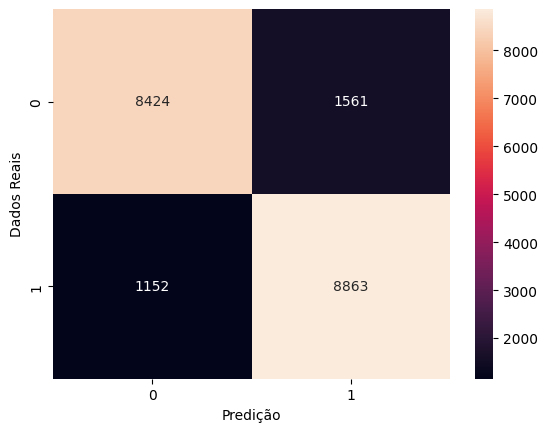

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predição')
plt.ylabel('Dados Reais')
plt.show()

R: O modelo testado conseguiu acertar a maior parte das predições realizadas, tendo 1152 FN e 1561 FP dentro de 20000 predições. Ele teve uma sensibilidade maior que precisão, ou seja, menos falsos negativos que falso positivos, sendo útil para classificações em que queremos reduzir os FN (como em detecção de doenças raras). Avaliando pelo score F1, obtivemos uma média entre os dois valores. Talvez se tivéssemos utilizado validação cruzada, teríamos um melhor desempenho do modelo.

7) Considere o powerlifting database.

In [24]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("dansbecker/powerlifting-database")

pl_df = pd.read_csv(path + '/openpowerlifting.csv')
pl_df

100%|██████████| 8.85M/8.85M [00:00<00:00, 11.1MB/s]

Extracting files...


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,NaN,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.00,320.00,3,181.85


In [25]:
pl_df.fillna(0, inplace=True)
pl_df

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,0.0,47.63,0.0,20.41,0.0,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,0.0,142.88,0.0,95.25,0.0,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,0.0,142.88,0.0,95.25,0.0,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,0.0,0.00,0.0,95.25,0.0,0.00,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,0.0,0.00,0.0,31.75,0.0,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,0.0,Elite,113.58,125,0.0,0.00,0.0,0.00,0.0,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,0.0,Elite,119.02,125,0.0,0.00,0.0,0.00,0.0,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,0.0,Elite,120.29,125,0.0,0.00,0.0,0.00,0.0,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,0.0,Elite,126.73,140,0.0,0.00,0.0,0.00,0.0,320.00,320.00,3,181.85


a. Vetorize as variáveis categóricas usando One-hot Encoding. Apresente os resultados obtidos.

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['Sex', 'Equipment']
encoded_data = encoder.fit_transform(pl_df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df

,Sex_F,Sex_M,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Straps,Equipment_Wraps
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
386409,0.0,1.0,1.0,0.0,0.0,0.0,0.0
386410,0.0,1.0,1.0,0.0,0.0,0.0,0.0
386411,0.0,1.0,1.0,0.0,0.0,0.0,0.0
386412,0.0,1.0,1.0,0.0,0.0,0.0,0.0


b. Vetorize as variáveis categóricas usando Dummy Coding. Compare os resultados desta vetorização com aqueles obtidos no item (a).

In [27]:
dummy_df = pd.get_dummies(pl_df[['Sex', 'Equipment']], prefix='dummy', drop_first=True)
dummy_df = dummy_df.astype(int)
dummy_df

,dummy_M,dummy_Raw,dummy_Single-ply,dummy_Straps,dummy_Wraps
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
386409,1,0,0,0,0
386410,1,0,0,0,0
386411,1,0,0,0,0
386412,1,0,0,0,0


R: Enquanto o One-Hot Encoding cria colunas para cada uma das categorias existentes, atribuindo valores 0 (se ausente) e 1 (se presente) em cada uma delas, no dummy encoding uma categoria é selecionada como referência e sua coluna não é explicitada (neste caso, sexo F e Equipment Multi-ply são as referências, então podemos ver que não foram incluídas no dataframe final). A categoria de referência é implicitamente representada por 0s, o que retira a possibilidade de registrarmos "ausência de valores" nesta representação.

c. Vetorize as variáveis categóricas usando Effect Coding. Compare os resultados desta vetorização com aqueles obtidos nos itens (a) e (b).

In [28]:
effect_df = pd.get_dummies(pl_df[['Sex', 'Equipment']], prefix='effect', drop_first=True)
effect_df = effect_df.astype(int)
effect_df

def effect_encoding(*cols):
    """
    Aplica effect encoding a um número qualquer de colunas.
    Para cada linha, se todos os valores nas colunas especificadas forem 0,
    substitui todos por -1.
    """
    mask = (effect_df[list(cols)] == 0).all(axis=1)
    for col in cols:
        effect_df.loc[mask, col] = -1

effect_encoding('effect_M')
effect_encoding('effect_Raw', 'effect_Straps', 'effect_Wraps', 'effect_Single-ply')
effect_df

,effect_M,effect_Raw,effect_Single-ply,effect_Straps,effect_Wraps
0,-1,0,0,0,1
1,-1,0,1,0,0
2,-1,0,1,0,0
3,-1,1,0,0,0
4,-1,1,0,0,0
...,...,...,...,...,...
386409,1,-1,-1,-1,-1
386410,1,-1,-1,-1,-1
386411,1,-1,-1,-1,-1
386412,1,-1,-1,-1,-1


R: Além das diferenças já mencionadas anteriormente, agora temos o Effect Encoding, onde a categoria de referência é sinalizada com -1 ao invés de 0. Dessa forma, podemos tratar valores faltantes também usando o 0. Sua vetorização funciona da seguinte forma: caso seja a categoria de referência, é representado por -1. Caso esteja presente naquela categoria, é sinalizado por 1. Quaisquer outras categorias são sinalizadas por 0. Dessa forma, conseguimos sinalizar dados faltantes e implicitamente deixamos claro qual é a categoria de referência.

8) Explique com suas palavras quais são as vantagens e as desvantagens de se realizar a vetorização de variáveis categóricas de um dataset.

R:
- Vantagens:
  - Preparação dos dados para algoritmos de ML: A maioria dos modelos de ML só sabe trabalhar com dados numéricos. Vetorizá-los deixa-os prontos para serem usados por algoritmos.
  - Captura de relações complexas: Transformando os dados categóricos em numéricos, expomos ao modelo relações entre os dados que nem sempre são explícitas enquanto dados categóricos. Por exemplo, codificar "Jovem", "Adulto" e "Idoso" como 0, 1, 2 passa ao modelo uma ideia de hierarquia.
  - Melhoria no desempenho do modelo: Variáveis categóricas bem vetorizadas se traduzem em modelos mais precisos.

- Desvantagens:
  - Dependendo da codificação usada (especialmente One-Hot Encoding), há aumento da dimensionalidade dos dados por conta da criação de novos vetores.
    - Isso se traduz em necessidade de mais tempo para treinamento do modelo e em maiores custos computacionais para o processamento dos dados.
  - Dificuldade com novas categorias: O modelo não saberá processar novos dados caso encontre uma categoria não vista previamente.
  - Perda de informação: Dependendo de como é feito o encoding, as vezes o modelo pode captar relações entre os dados que não existem. Por exemplo, codificar "Azul", "Vermelho", "Verde" como 0, 1, 2 pode, erroneamente, fazer o modelo inferir que há uma relação de superioridade do verde sobre todas as outras cores.

a. Considere ainda o powerlifting database.

i. Compacte as features categóricas da base de dados usando Feature Hashing.

In [29]:
from sklearn.feature_extraction import FeatureHasher
from sys import getsizeof
n_features_dict = {col: len(pl_df[col].unique()) for col in categorical_cols}

# Aplicando o Feature Hashing em cada coluna categórica
hashed_dfs = []
for col in categorical_cols:
    # Convertendo a coluna em uma lista de listas de strings
    col_data = pl_df[col].apply(lambda x: [x]).tolist()

    # Aplicando o Feature Hashing
    hasher = FeatureHasher(n_features=n_features_dict[col], input_type='string')
    hashed_features = hasher.transform(col_data).toarray()

    # Criando um DataFrame com os resultados
    hashed_df = pd.DataFrame(hashed_features, columns=[f'{col}_Hash_{i}' for i in range(n_features_dict[col])])
    hashed_dfs.append(hashed_df)

# Concatenando todos os DataFrames hashed com o DataFrame original
result_df = pd.concat([pl_df.reset_index(drop=True)] + hashed_dfs, axis=1)

result_df

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,...,TotalKg,Place,Wilks,Sex_Hash_0,Sex_Hash_1,Equipment_Hash_0,Equipment_Hash_1,Equipment_Hash_2,Equipment_Hash_3,Equipment_Hash_4
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,0.0,47.63,...,138.35,1,155.05,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,0.0,142.88,...,401.42,1,456.38,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,0.0,142.88,...,401.42,1,456.38,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,0.0,0.00,...,95.25,1,108.29,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,0.0,0.00,...,122.47,1,130.47,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,0.0,Elite,113.58,125,0.0,0.00,...,347.50,2,202.60,1.0,0.0,0.0,0.0,-1.0,0.0,0.0
386410,8481,Justin Zottl,M,Multi-ply,0.0,Elite,119.02,125,0.0,0.00,...,322.50,3,185.77,1.0,0.0,0.0,0.0,-1.0,0.0,0.0
386411,8481,Jake Anderson,M,Multi-ply,0.0,Elite,120.29,125,0.0,0.00,...,367.50,1,211.17,1.0,0.0,0.0,0.0,-1.0,0.0,0.0
386412,8481,Jeff Bumanglag,M,Multi-ply,0.0,Elite,126.73,140,0.0,0.00,...,320.00,3,181.85,1.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [30]:
# Comparando o uso de memória
print('\nUso de memória:')
for col in categorical_cols:
    original_size = getsizeof(pl_df[col])
    hashed_size = getsizeof(result_df[[f'{col}_Hash_{i}' for i in range(n_features_dict[col])]])
    print(f'{col}:')
    print(f'  - Original: {original_size} bytes')
    print(f'  - Hashed: {hashed_size} bytes')


Uso de memória:
Sex:
  - Original: 22412176 bytes
  - Hashed: 6182788 bytes
Equipment:
  - Original: 24345539 bytes
  - Hashed: 15456724 bytes


ii. Compacte as features categóricas da base de dados usando Bin Counting.

In [31]:
# Selecionar features categóricas e target
categorical_features = ['Sex', 'Equipment']
target = 'TotalKg'

# Criar um DataFrame para armazenar as features codificadas
bin_df = pl_df[['Sex', 'Equipment', 'TotalKg']].copy()

# Aplicar Bin Counting para cada feature categórica
for feature in categorical_features:
    # Calcular a média do target por categoria
    mean_target = bin_df.groupby(feature)[target].mean().to_dict()

    # Substituir as categorias pelas médias
    bin_df[f'{feature}_BinCount'] = bin_df[feature].map(mean_target)

bin_df

,Sex,Equipment,TotalKg,Sex_BinCount,Equipment_BinCount
0,F,Wraps,138.35,268.331502,513.163919
1,F,Single-ply,401.42,268.331502,387.484429
2,F,Single-ply,401.42,268.331502,387.484429
3,F,Raw,95.25,268.331502,373.769131
4,F,Raw,122.47,268.331502,373.769131
...,...,...,...,...,...
386409,M,Multi-ply,347.50,436.618982,496.478635
386410,M,Multi-ply,322.50,436.618982,496.478635
386411,M,Multi-ply,367.50,436.618982,496.478635
386412,M,Multi-ply,320.00,436.618982,496.478635


iii. Analise os resultados obtidos no itens (i) e (ii).

R: Enquanto o Feature Hashing é eficiente em memória, pois não armazena um dicionário explícito de mapeamento e bom para dados com muitas categorias, ele também permite colisões de hash e perde interpretabilidade, pois o mapeamento não é explícito. Já o Bin Counting captura informações estatísticas relevantes para o problema e reduz dimensionalidade sem perda significativa de informações das previsões, porém requer coleta prévia de dados e pode sofrer com vazamento de dados caso seja feito de forma incorreta.

9) Responda com suas palavras:

a. O que é uma projeção linear?

R: A projeção linear é o resultado de quando reduzimos a dimensionalidade de um dataset. Por exemplo: quando projetamos os dados em um espaço multidimensional e queremos reduzir a dimensionalidade dos dados, realizamos uma projeção linear dos pontos de forma com que temos uma projeção em apenas duas (ou três) dimensões. Projetamos o vetor original em um outro vetor e a isso damos o nome de projeção linear.

b. Como uma projeção linear é aplicada a um espaço de dados?

R: Pegamos os dados, projetamos seus vetores originais em outros vetores e temos a projeção resultante. Essa projeção resultante pode ser utilizada para alimentar alguns algoritmos com o intuito de reduzir a complexidade do modelo.

c. Descreva os passos executados pelo algoritmo de PCA para realizar a extração das componentes principais e, assim, reduzindo a dimensionalidade do dataset.

R: 1) Cálculo da variância máxima: primeiro, o algoritmo encontra a direção de variância máxima, que será denominado Componente 1.

2) Depois, encontra a direção que contém mais informações - aqui, chamado de Componente 2.

3) Após, rotaciona os dados de forma com que o componente 1 se alinhe com o eixo X e o componente 2 se alinhe com o eixo Y.

4) Subtraímos a média dos dados, para que eles fiquem centrados em torno de 0.

5) Realizamos a redução de dimensionalidade, fazendo a projeção linear dos pontos.

6) Desfazemos a rotação dos dados e adicionamos novamente a média aos dados originais.

10) Considere o Lung Cancer Prediction Dataset:

a. Aplique o algoritmo de PCA e selecione as componentes mais relevantes. Apresente os resultados graficamente.

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanugarg274/lung-cancer-prediction-dataset")

lung_df = pd.read_csv(path + '/Lung Cancer Dataset.csv')
lung_df

100%|██████████| 127k/127k [00:00<00:00, 566kB/s]

Extracting files...


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target = lung_df['PULMONARY_DISEASE']
features = lung_df.drop('PULMONARY_DISEASE', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=3, whiten=True)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (5000, 17)
Reduced shape: (5000, 3)


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(target)
y

array([0, 1, 0, ..., 0, 0, 0])

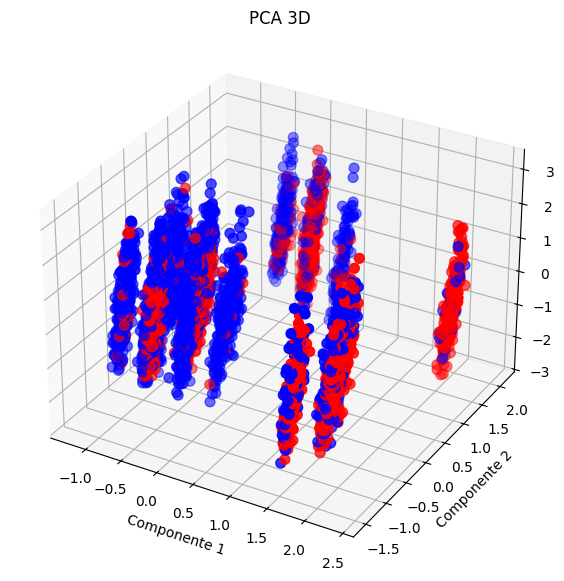

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='bwr', s=50)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.title('PCA 3D')
plt.show()

11) Responda:

a. Qual a relação entre o processo conhecido como whitening e o PCA? Explique.

R: O whitening faz com que os componentes principais estejam na mesma escala, normalizando a variância (num processo parecido com o que StandardScaler faz), o que faz com que os dados sejam dispostos em um círculo central ao invés de uma elipse. Além disso, também pode auxiliar na remoção de correlações entre as features que possam ter passado intactas durante o PCA. Ele deixa a variância igual a 1 e a correlação entre os componentes igual a 0. Usar os dois em conjunto na etapa de pré-processamento de dados pode melhorar a convergência do algoritmo.

b. Explique qual o procedimento necessário para se escolher o número de componentes principais baseando-se na curva de carga.

R: Calculamos as variâncias para cada feature e plotamos em um gráfico de curva de carga (features x variância). As melhores features para serem selecionadas são as features correspondentes às maiores variâncias. Basicamente, selecionamos um threshold para a variância (normalmente variância >= 80%) e as melhores features a serem utilizadas são as com variância maior ou igual ao threshold.

12) Responda:

a. O algoritmo de PCA poderia ser aplicado a qualquer tipo de base de dados? Explique.

R: Não. Como o PCA é computacionalmente caro, ele não é apropriado para bases com um grande número de features. Também não terá um desempenho satisfatório se as features não possuírem correlações lineares entre si. Caso o dataset possua apenas registros de números brutos, também não é indicada a aplicação de PCA nessas features.

b. Quais são as principais limitações do PCA? Explique a sua resposta.

R: Como mencionado acima, o PCA é um procedimento computacionalmente caro. Além disso, a transformação resultante é bastante complexa de se interpretar, então não temos certeza de seus resultados. Por fim, não temos meios de executar PCA de forma contínua, pois não é viável ficar recalculando os componentes principais sempre que tivermos novos dados.